# 📊 Bollinger Bands v Pythonu

In [3]:
# 📦 KROK 1 – import potřebných knihoven
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 💻 1️⃣ Vytvoření simulovaných dat

In [ ]:
# 📅 KROK 2 – simulace dat (můžeš nahradit vlastními)
np.random.seed(42)
dates = pd.date_range("2024-01-01", periods=150)
price = np.cumsum(np.random.randn(150)) + 100  # náhodná cena kolem 100

# vytvoření DataFrame
df = pd.DataFrame({"Date": dates, "Close": price})
df.set_index("Date", inplace=True)

### 🧩 Chceš použít reálná data?

Můžeš místo simulovaných dat načíst reálné ceny akcií nebo krypta (např. pomocí `yfinance`):


In [ ]:
# Instalace yfinance pro získání reálných dat
%pip install yfinance

In [ ]:
import yfinance as yf

# Stažení dat např. pro Apple
df = yf.download("AAPL", start="2024-01-01", end="2024-10-01")

## Zpracování dat a vizualizace Bollinger Bands

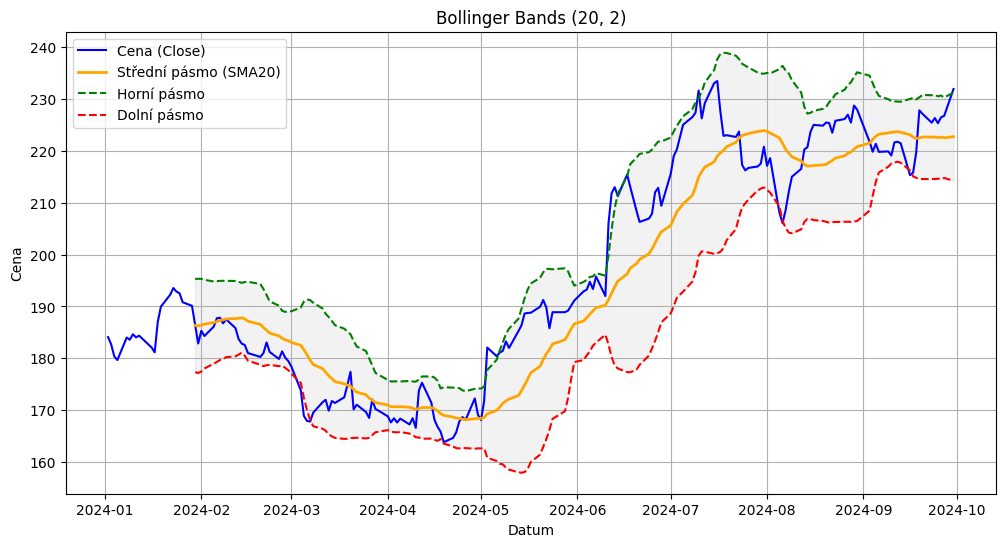

In [5]:
# ⚙️ KROK 3 – výpočet Bollinger Bands (20, 2)
window = 20  # délka periody
multiplier = 2  # násobek směrodatné odchylky

df["SMA20"] = df["Close"].rolling(window=window).mean()
df["STD20"] = df["Close"].rolling(window=window).std()

df["UpperBand"] = df["SMA20"] + multiplier * df["STD20"]
df["LowerBand"] = df["SMA20"] - multiplier * df["STD20"]

# 🎨 KROK 4 – vizualizace
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Cena (Close)", color="blue", linewidth=1.5)
plt.plot(df.index, df["SMA20"], label="Střední pásmo (SMA20)", color="orange", linewidth=2)
plt.plot(df.index, df["UpperBand"], label="Horní pásmo", color="green", linestyle="--", linewidth=1.5)
plt.plot(df.index, df["LowerBand"], label="Dolní pásmo", color="red", linestyle="--", linewidth=1.5)

# Vyplnění mezi pásmy
plt.fill_between(df.index, df["LowerBand"], df["UpperBand"], color="gray", alpha=0.1)

# Nastavení grafu
plt.title("Bollinger Bands (20, 2)")
plt.xlabel("Datum")
plt.ylabel("Cena")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


## 🧠 Jak to funguje

1. **rolling(window=20).mean()** → spočítá 20denní SMA
2. **rolling(window=20).std()** → spočítá 20denní směrodatnou odchylku (volatilitu)
3. **UpperBand / LowerBand** = SMA ± 2×σ
4. **fill_between()** vykreslí šedé pásmo mezi horní a dolní hranicí

## 📊 Tip na experimenty

* Zkus měnit `window` (např. 10, 50) → ovlivní vyhlazení.
* Zkus měnit `multiplier` (např. 1.5 nebo 3) → ovlivní šířku pásem.
* Zkus kombinovat s RSI nebo EMA, aby sis otestoval různé obchodní podmínky.